# This Script Contains the Following Points
## 6. Import Databases and Dataframe
## 7. Create a Profiling Variable
## 8. Create Viz to Show Distribution of Profiles
## 9. Aggregate Variables on a Customer Profile
## 10. Compare Profiles and Regions

### 6. Import Databases and Dataframe

In [1]:
# Import Libs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Dataframe
df = pd.read_pickle(r'/Users/allisonweese/Documents/Achievement 4 Project/2 Data/Prepared Data/ordsprodscomb7.16.pkl')

In [3]:
# Check
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,Dependants,fam_status,income,Region,order_count,exclusion_flag
0,2539329,1,1,2,8,0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,False
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,False
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,False
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,False
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,South,59,False


### 7. Profiling Variable

In [4]:
# Binning age and income
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 30, 45, 65, 100], labels=['Under 18', '18-30', '30-45', '45-65', '65+'])
df['income_group'] = pd.cut(df['income'], bins=[0, 30000, 60000, 100000, 150000, 200000], labels=['Low', 'Lower-middle', 'Middle', 'Upper-middle', 'High'])

In [8]:
# Define profile function
def assign_profile(row):
    if row['Dependants'] == 0:
        if row['Age'] < 30:
            return 'Single adult'
        elif row['Age'] >= 30 and row['Age'] <= 45:
            return 'Middle-aged single'
        else:
            return 'Older adult'
    else:
        if row['Age'] < 30:
            return 'Young parent'
        elif row['Age'] >= 30 and row['Age'] <= 45:
            return 'Middle-aged parent'
        else:
            return 'Older parent'

In [9]:
# Apply profile function to create a new column
df['profile'] = df.apply(assign_profile, axis=1)

In [12]:
# Check Profile Success
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,Dependants,fam_status,income,Region,order_count,exclusion_flag,age_group,income_group,profile
0,2539329,1,1,2,8,0,196,1,0,Soda,...,2/17/2019,3,married,40423,South,59,False,30-45,Lower-middle,Middle-aged parent
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,2/17/2019,3,married,40423,South,59,False,30-45,Lower-middle,Middle-aged parent
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,...,2/17/2019,3,married,40423,South,59,False,30-45,Lower-middle,Middle-aged parent
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,...,2/17/2019,3,married,40423,South,59,False,30-45,Lower-middle,Middle-aged parent
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,2/17/2019,3,married,40423,South,59,False,30-45,Lower-middle,Middle-aged parent


In [17]:
# Noticed low activity customers were still included in df

In [14]:
# Remove rows where exclusion_flag is True
df = df[df['exclusion_flag'] != True]

In [16]:
# Check success
df.shape

(32401975, 33)

### 8. Create Visualization of Profiles

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Older parent'),
  Text(1, 0, 'Middle-aged parent'),
  Text(2, 0, 'Young parent'),
  Text(3, 0, 'Older adult'),
  Text(4, 0, 'Middle-aged single'),
  Text(5, 0, 'Single adult')])

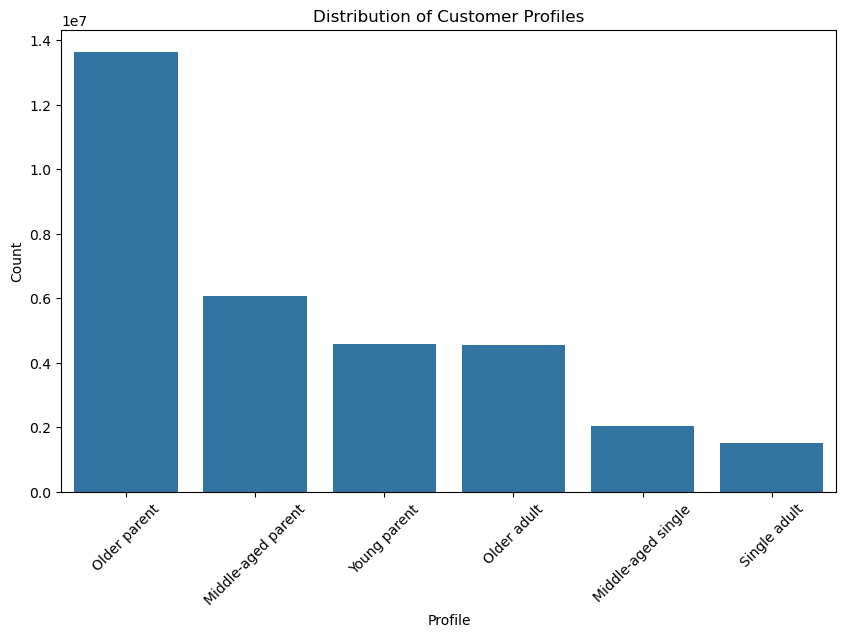

In [22]:
# Create a bar plot for the distribution of profiles
# Create a bar plot for the distribution of profiles
plt.figure(figsize=(10, 6))
bar = sns.countplot(x='profile', data=df, order=df['profile'].value_counts().index)
plt.title('Distribution of Customer Profiles')
plt.xlabel('Profile')
plt.ylabel('Count')
plt.xticks(rotation=45)

In [20]:
# We can see that Older Parents are the most active users of Instacart
# Single Adults are least active

In [23]:
# Export bar chart
bar.figure.savefig(os.path.join('/Users/allisonweese/Documents/Achievement 4 Project/4 Analysis/Visualizations/parentprofilebar.png'))

### 9. Aggregate

In [26]:
# See columns
print(df.columns)

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'spending_flag', 'order_frequency_flag', 'Gender',
       'State', 'Age', 'date_joined', 'Dependants', 'fam_status', 'income',
       'Region', 'order_count', 'exclusion_flag', 'age_group', 'income_group',
       'profile'],
      dtype='object')


In [27]:
# Group by 'profile' and aggregate max, mean, and min for 'order_count' and 'prices'
aggregated_df = df.groupby('profile').agg({
    'order_count': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']
}).reset_index()

In [29]:
# Print totals
print(aggregated_df)

              profile order_count                 prices               
                              max        mean min    max      mean  min
0  Middle-aged parent        2901  428.893302   5   25.0  7.794481  1.0
1  Middle-aged single        1940  414.417686   5   25.0  7.784902  1.0
2         Older adult        3637  429.122945   5   25.0  7.796896  1.0
3        Older parent        3704  418.339530   5   25.0  7.790374  1.0
4        Single adult        2429  417.401127   5   25.0  7.772080  1.0
5        Young parent        2577  421.994466   5   25.0  7.785841  1.0


### 10. Compare Profiles with Regions

In [30]:
# Pivot table for mean prices by profile and region
pivot_table = df.pivot_table(index='profile', columns='Region', values='prices', aggfunc='mean')

Text(120.7222222222222, 0.5, 'Profile')

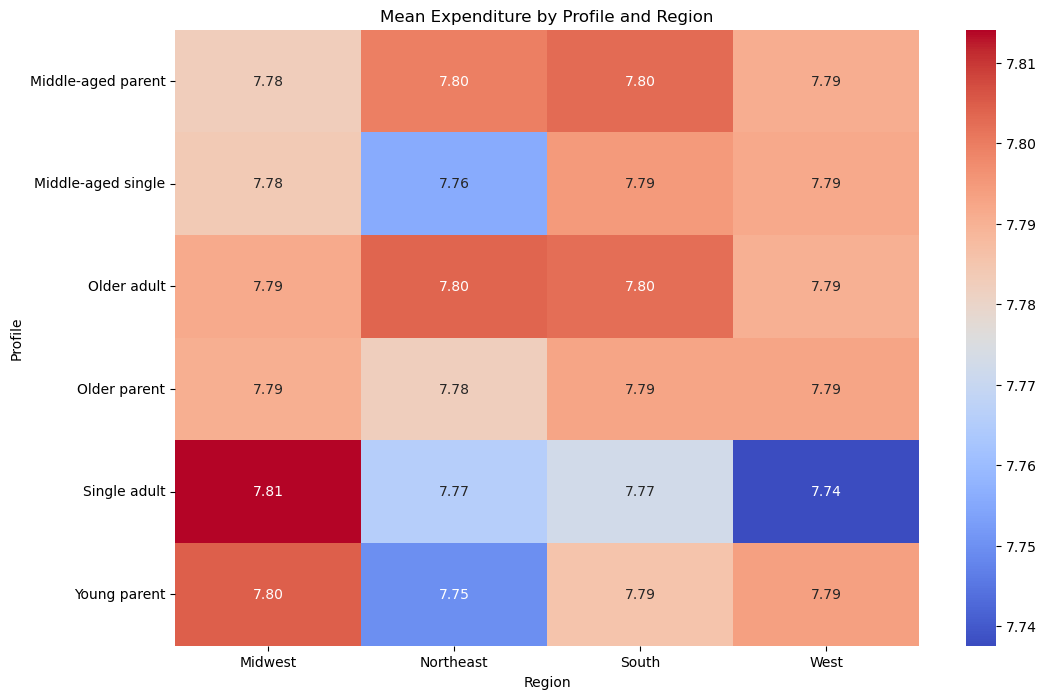

In [31]:
# Create a heatmap to visualize the mean expenditure by profile and region
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mean Expenditure by Profile and Region')
plt.xlabel('Region')
plt.ylabel('Profile')

In [32]:
# Export heat map
heatmap.figure.savefig(os.path.join('/Users/allisonweese/Documents/Achievement 4 Project/4 Analysis/Visualizations/profileregionheatmap.png'))

In [33]:
# Export Dataframe
df.to_pickle(os.path.join('/Users/allisonweese/Documents/Achievement 4 Project/2 Data/Prepared Data/opc4.10.pkl'))